### **0. Data Ingestion, Preliminary Data Analysis**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import zipfile

In [ ]:
# zip_path = r'/'

# with zipfile.ZipFile(zip_path, r) as zip_ref:
#     zip_ref.printdir()
#     zip_ref.extractall("Datasets")

In [ ]:
# with zipfile.ZipFile(zip_path) as z:
#     with z.open("winequality-red.csv") as f:
#         red_wine = pd.read_csv(f, sep=";")

In [ ]:
# Read the data
white_wine = pd.read_csv('winequality-white.csv', sep = ";")
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
# Check the columns
white_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
# Check the numerical columns and get the description
num_features = white_wine.select_dtypes(include=['int64', 'float64']).columns
white_wine[num_features].describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


In [9]:
# print the unique quality of the white_wine
white_wine.quality.unique()

array([6, 5, 7, 8, 4, 3, 9])

| Numeric | Category   | Meaning               |
| ------- | ---------- | --------------------- |
| 3–4     | **Low**    | Poor quality wines    |
| 5–6     | **Medium** | Average/typical wines |
| 7–8+    | **High**   | Premium-quality wines |


In [ ]:
# Map the quality of the wine based on quality
def map_quality_category(x):
    if x <= 4:
        return 'Low'
    elif x <= 6:
        return 'Medium'
    else:
        return 'High'
    
# lets apply the function
white_wine['quality_label'] = white_wine['quality'].apply(map_quality_category)
    

In [ ]:
# Display output
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,Medium
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,Medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,Medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Medium
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Medium


In [12]:
# Lets make a copy of our data
df = white_wine.copy()

----------------------------------------------------------------
 ### **1. Univariate analysis**
----------------------------------------------------------------

Analysing one column or one feature at a time.

What are we looking out for when carrying out univariate analysis?

1. Distribution -Normal, poisson, binomial, Bernoulli distributions
2. How they are organized around the centre - measure of central tendency(mean, median and mode)
3. How they are dispersed from the centre - measure of dispersion(standard deviation, variance, kurtosis, skewness)
4. The type of plots that can be used include  **histogram**,**boxplots**, **countplot**.

The idea behind univariate analysis is To understand each variable individually, its distribution, central tendency, spread, shape, and presence of outliers..

This helps you decide:

- Which variables may need scaling, transformation, or binning

- Whether skewness could affect modeling assumptions (e.g., for regression)

- Which variables are categorical vs continuous

- How quality labels (target variable) are distributed

In [31]:
def univariate_numerical_eda(df, column):
    """
    Perform univariate EDA on single numeical column.
    Display Summary statistics, skewness, kurtosis, histogram, KDE, and boxplot
    """
    # Print the display
    print(f"\nFeature: {column}")
    print("=" * 40)
    print(f"{df[column].describe().to_frame()}") # Check the description of the numerical column
    print(f"\n Skewness: {df[column].skew():.3f}") # Check the skewness
    print(f"\n Kurtosis: {df[column].kurt():.3f}") # check the kurtosis

    # Data visualization
    plt.figure(figsize=(12,4))

    # Histogram + KDE
    plt.subplot(1,2,1)
    sns.histplot(df[column], kde=True, bins=30, color='green')
    plt.title(f"\n Distribution of {column}", fontsize=13)
    plt.xlabel(column)
    plt.ylabel("Frequency")

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[column], color='green')
    plt.title(f"\nBoxplot of {column}", fontsize=13)

    # Display the plots
    plt.tight_layout()
    plt.show()

    # Optional note on transforamtion
    if abs(df[column].skew()) > 1:
        print(f"\n{column} is highly skewed. Consider log or Box-cox transformation")
    elif abs(df[column].skew()) > 0.5:
        print(f"\n{column} is moderately skewed.")
    else:
        print(f"\n{column} is fairly symmetric")


Feature: fixed acidity
       fixed acidity
count    4898.000000
mean        6.854788
std         0.843868
min         3.800000
25%         6.300000
50%         6.800000
75%         7.300000
max        14.200000

 Skewness: 0.648

 Kurtosis: 2.172


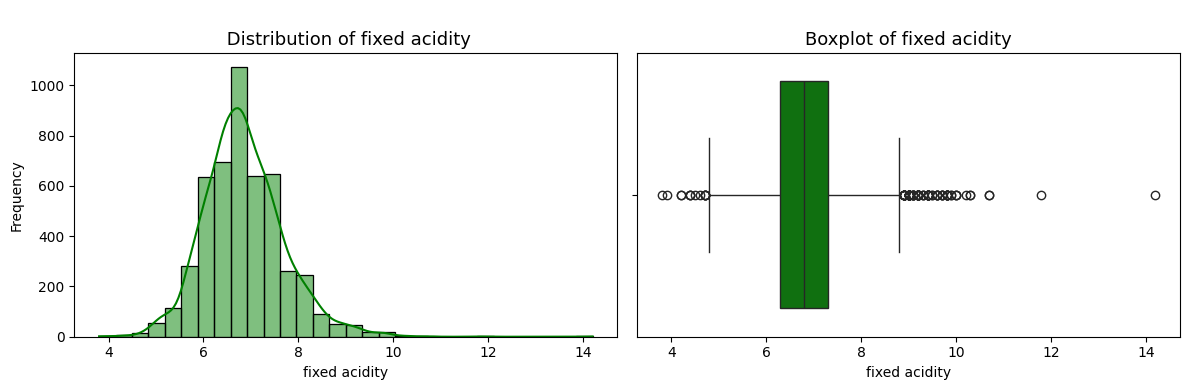


fixed acidity is moderately skewed.


In [32]:
# Display the result
univariate_numerical_eda(df, 'fixed acidity')


Feature: fixed acidity
       fixed acidity
count    4898.000000
mean        6.854788
std         0.843868
min         3.800000
25%         6.300000
50%         6.800000
75%         7.300000
max        14.200000

 Skewness: 0.648

 Kurtosis: 2.172


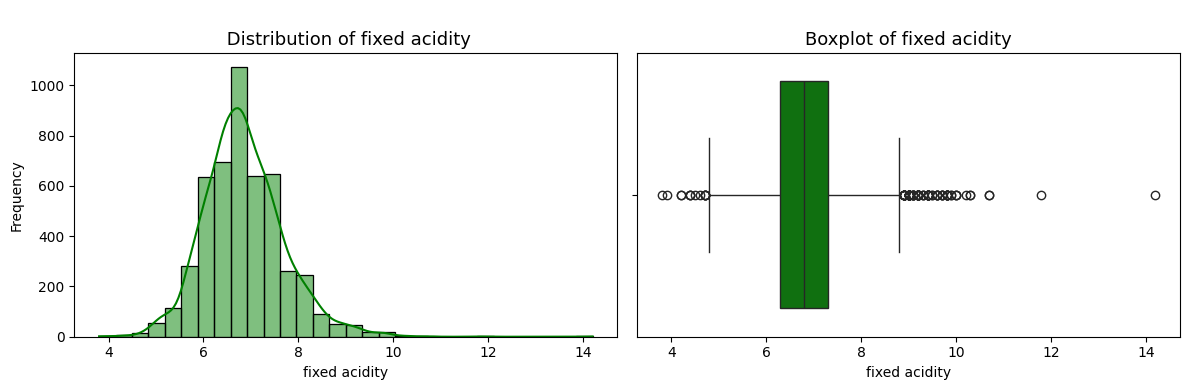


fixed acidity is moderately skewed.

Feature: volatile acidity
       volatile acidity
count       4898.000000
mean           0.278241
std            0.100795
min            0.080000
25%            0.210000
50%            0.260000
75%            0.320000
max            1.100000

 Skewness: 1.577

 Kurtosis: 5.092


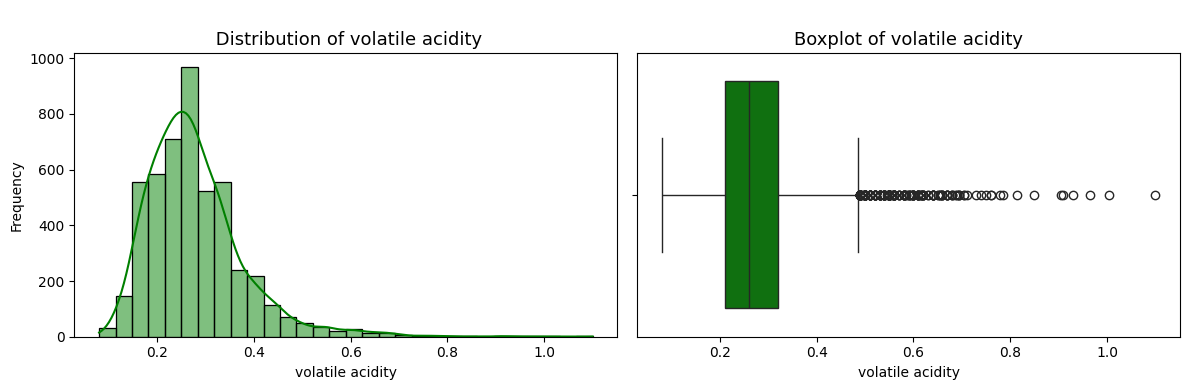


volatile acidity is highly skewed. Consider log or Box-cox transformation

Feature: citric acid
       citric acid
count  4898.000000
mean      0.334192
std       0.121020
min       0.000000
25%       0.270000
50%       0.320000
75%       0.390000
max       1.660000

 Skewness: 1.282

 Kurtosis: 6.175


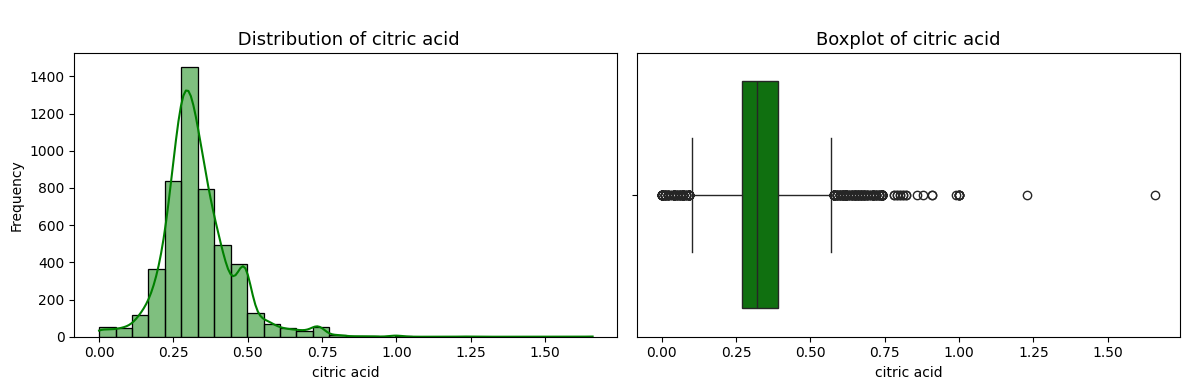


citric acid is highly skewed. Consider log or Box-cox transformation

Feature: residual sugar
       residual sugar
count     4898.000000
mean         6.391415
std          5.072058
min          0.600000
25%          1.700000
50%          5.200000
75%          9.900000
max         65.800000

 Skewness: 1.077

 Kurtosis: 3.470


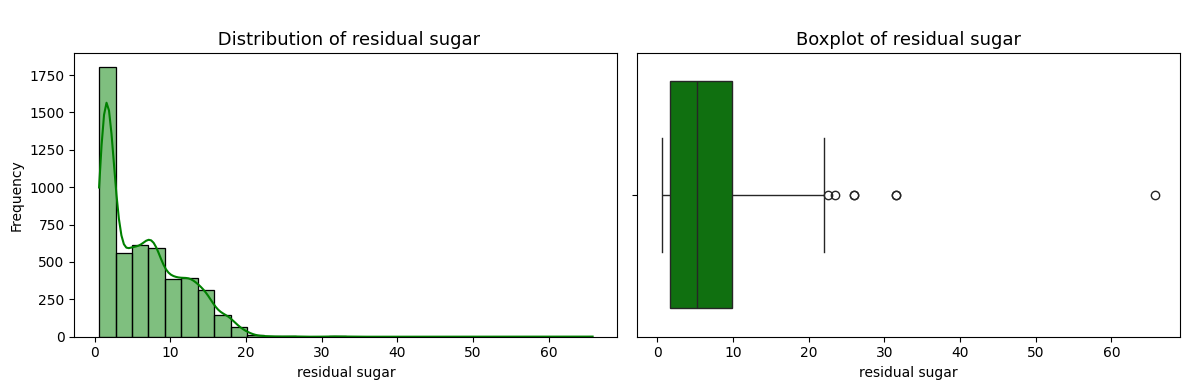


residual sugar is highly skewed. Consider log or Box-cox transformation

Feature: chlorides
         chlorides
count  4898.000000
mean      0.045772
std       0.021848
min       0.009000
25%       0.036000
50%       0.043000
75%       0.050000
max       0.346000

 Skewness: 5.023

 Kurtosis: 37.565


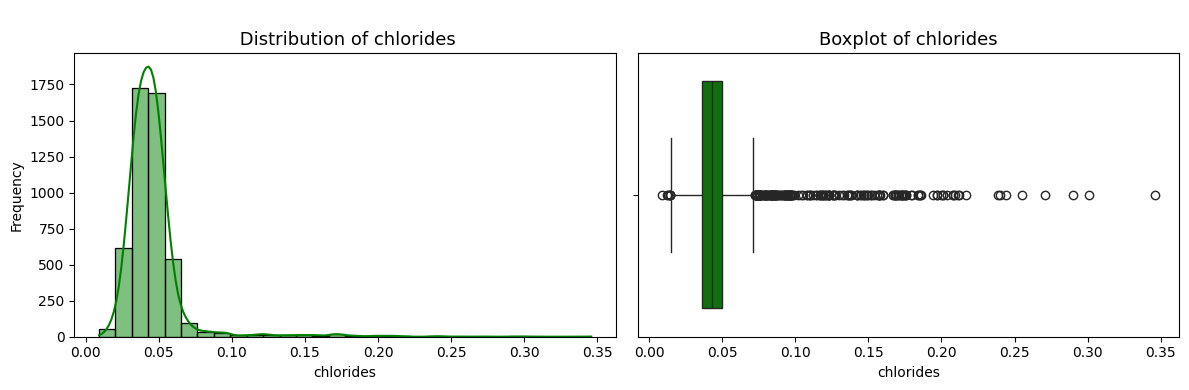


chlorides is highly skewed. Consider log or Box-cox transformation

Feature: free sulfur dioxide
       free sulfur dioxide
count          4898.000000
mean             35.308085
std              17.007137
min               2.000000
25%              23.000000
50%              34.000000
75%              46.000000
max             289.000000

 Skewness: 1.407

 Kurtosis: 11.466


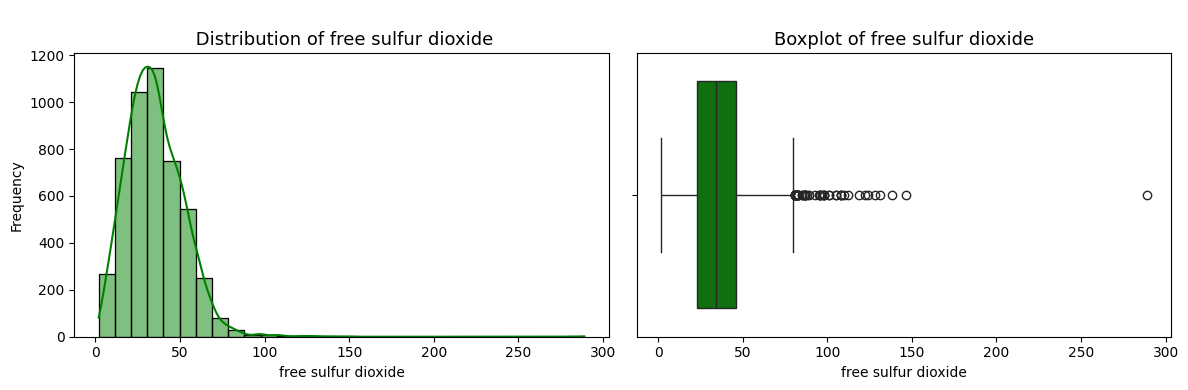


free sulfur dioxide is highly skewed. Consider log or Box-cox transformation

Feature: total sulfur dioxide
       total sulfur dioxide
count           4898.000000
mean             138.360657
std               42.498065
min                9.000000
25%              108.000000
50%              134.000000
75%              167.000000
max              440.000000

 Skewness: 0.391

 Kurtosis: 0.572


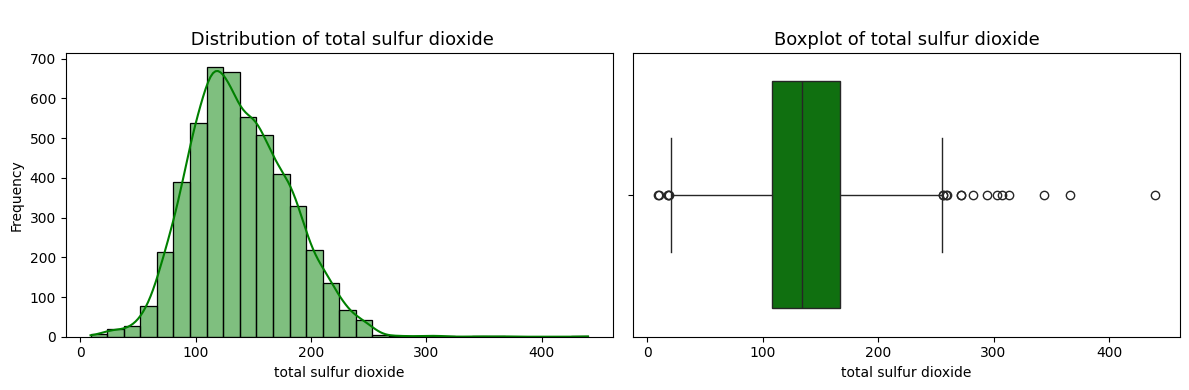


total sulfur dioxide is fairly symmetric

Feature: density
           density
count  4898.000000
mean      0.994027
std       0.002991
min       0.987110
25%       0.991723
50%       0.993740
75%       0.996100
max       1.038980

 Skewness: 0.978

 Kurtosis: 9.794


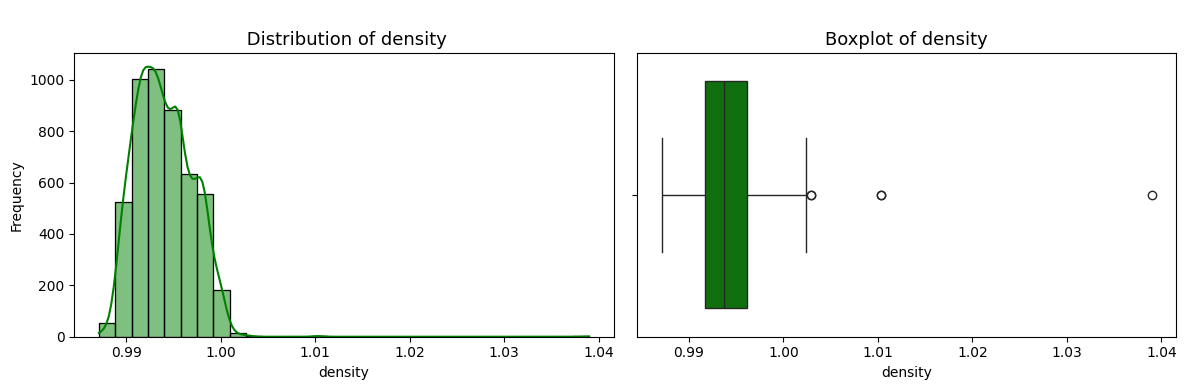


density is moderately skewed.

Feature: pH
                pH
count  4898.000000
mean      3.188267
std       0.151001
min       2.720000
25%       3.090000
50%       3.180000
75%       3.280000
max       3.820000

 Skewness: 0.458

 Kurtosis: 0.531


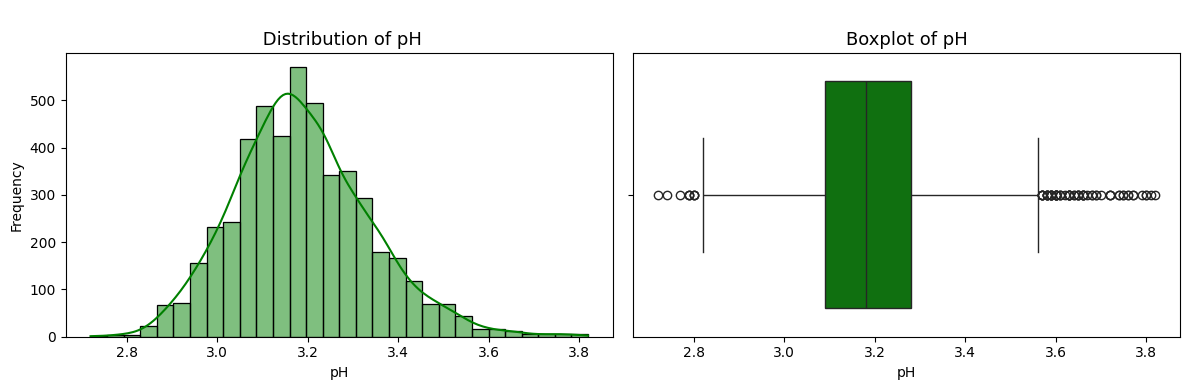


pH is fairly symmetric

Feature: sulphates
         sulphates
count  4898.000000
mean      0.489847
std       0.114126
min       0.220000
25%       0.410000
50%       0.470000
75%       0.550000
max       1.080000

 Skewness: 0.977

 Kurtosis: 1.591


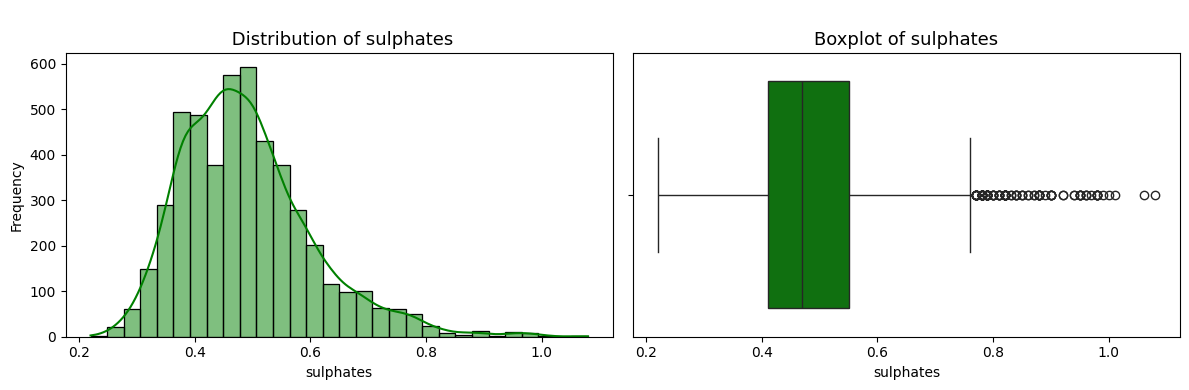


sulphates is moderately skewed.

Feature: alcohol
           alcohol
count  4898.000000
mean     10.514267
std       1.230621
min       8.000000
25%       9.500000
50%      10.400000
75%      11.400000
max      14.200000

 Skewness: 0.487

 Kurtosis: -0.698


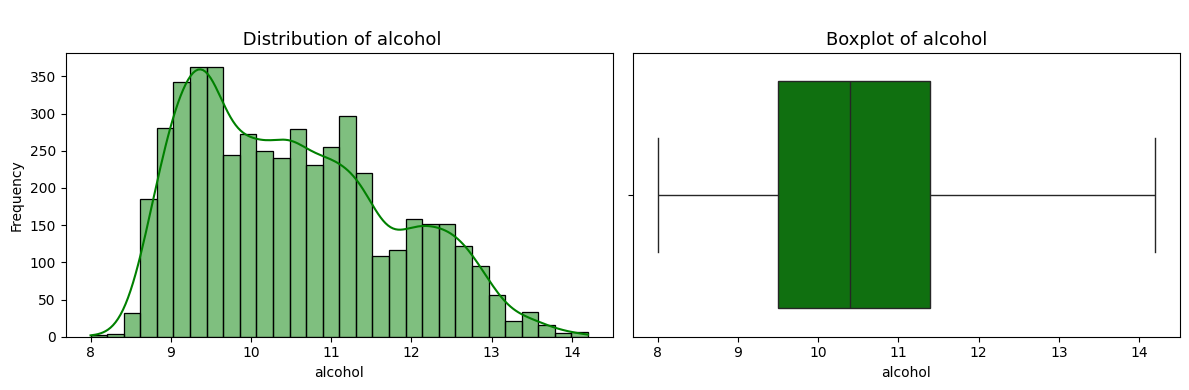


alcohol is fairly symmetric

Feature: quality
           quality
count  4898.000000
mean      5.877909
std       0.885639
min       3.000000
25%       5.000000
50%       6.000000
75%       6.000000
max       9.000000

 Skewness: 0.156

 Kurtosis: 0.217


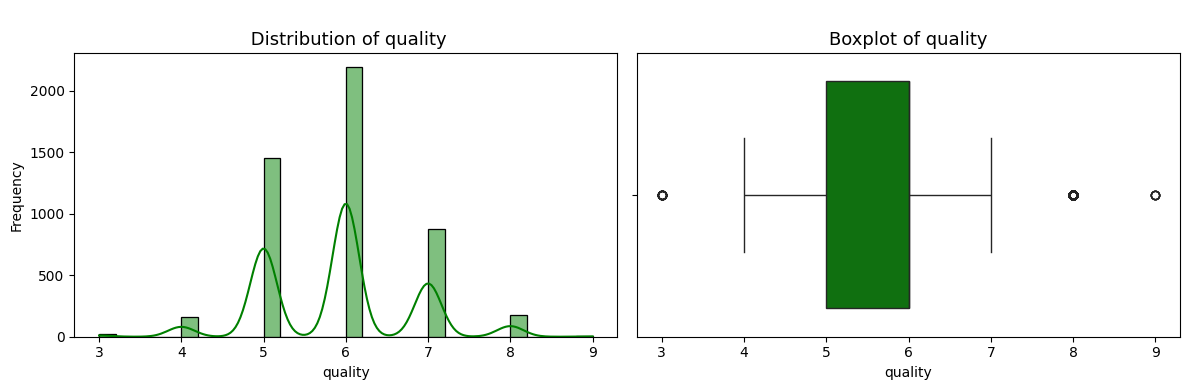


quality is fairly symmetric


In [33]:
# Display all columns using a for loop
for col in num_features:
    univariate_numerical_eda(df, col)

In [52]:
#Pefroming the univariate for a categorical EDA
def univariate_categorical_eda(df, column):
    """
    Perform univariate EDA on a categorical or ordinal column.
    Display frequency table, proportion, and a countplot    
    """

    print(f"Feature: {column}")
    print("="*40)

    # Frequency + Proportion
    freq = df[column].value_counts()
    prop = df[column].value_counts(normalize=True) * 100
    summary = pd.DataFrame({"Count": freq, "Percentage": prop.round(2)})
    print(summary)
    print()

    # Visualization
    plt.figure(figsize=(8,5))
    ax = sns.countplot(x=column, data=df, palette="Set2", order=freq.index, color="green")
    plt.title(f"Distribtuion of {column}", fontsize=13)
    plt.xlabel(column)
    plt.ylabel("Count")

    # Annotate each bar with the percentage
    total = len(df[column])
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2, height + 1, 
                f"{(height/total)*100:.1f}%", ha="center")
    
    plt.tight_layout()
    plt.show()

In [53]:
# Display the columns in the white wine dataset
white_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'quality_label'],
      dtype='object')

In [54]:
# CHeck the unique quality label 
white_wine["quality_label"].unique()

array(['Medium', 'High', 'Low'], dtype=object)

Feature: quality_label
               Count  Percentage
quality_label                   
Medium          3818       77.95
High            1060       21.64
Low               20        0.41



C:\Users\kanyi\AppData\Local\Temp\ipykernel_21164\3969399035.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df, palette="Set2", order=freq.index, color="green")


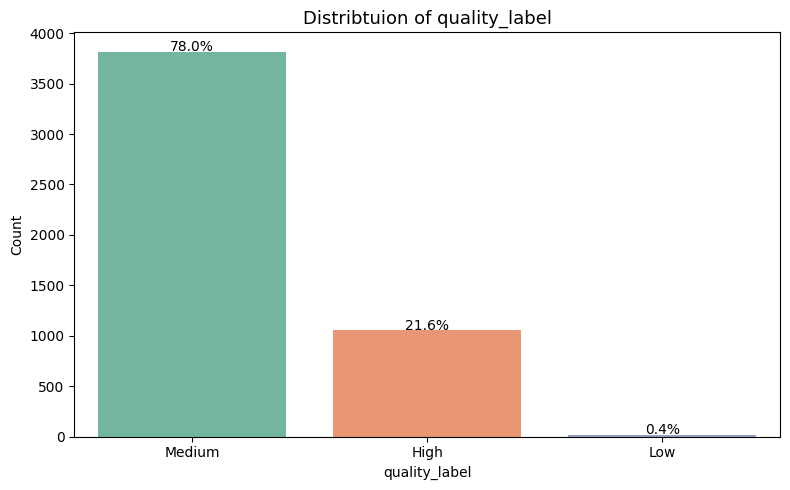

In [55]:
univariate_categorical_eda(white_wine, "quality_label")

**Key Univariate Findings**

| Feature Type                     | Observation                                                                                                          | What It Means / Implication                                                                                                                             |
| -------------------------------- | -------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Most numeric features**        | Continuous, but several (e.g., `residual sugar`, `volatile acidity`, `citric acid`, `chlorides`, `free sulfur dioxide`) are **right-skewed** | These long tails can distort algorithms sensitive to scale (e.g., linear regression, KNN ).  We might apply **log or Box-Cox transformation** to normalize. |
| **`alcohol`**                    | Often roughly symmetric but **wide range**                                                                           | Important predictor — normalization or standardization can stabilize learning.                                                                          |
| **`volatile acidity`**           | right-skewed                                                                                          | Outliers might indicate poor fermentation  we will check relationships with `quality` later.                                                             |
| **Outliers visible in boxplots** | Especially in sulfur-related variables                                                                               | Before modeling, we must decide: **clip, transform, or leave** (some are natural domain outliers).                                                      |
| **`quality` (numeric)**          | Discrete integers, concentrated in 5–6                                                                               | Dataset is **imbalanced** — middle (Medium quality) dominates.                                                                                          |


**How to sort things out from the insight we have gathered**

| Insight                              | Why It Matters                                                                                                 | Actionable Step                                                                  |
| ------------------------------------ | -------------------------------------------------------------------------------------------------------------- | -------------------------------------------------------------------------------- |
| **Skewed variables**                 | Some algorithms (like linear/logistic regression, SVMs, KNNs) assume features are approximately normal.        | Apply transformations (`np.log1p`, `StandardScaler`, etc.) where needed.         |
| **Wide feature ranges**              | Features measured on different scales (e.g., pH ~3–4, sulfur dioxide ~0–300) can cause biased weight learning. | Use **scaling** (e.g., StandardScaler or MinMaxScaler).                          |
| **Outliers**                         | May heavily influence mean-based models.                                                                       | Investigate domain causes - use **IQR-based clipping or robust scaling**.        |
| **Imbalanced target**                | ML models may favor the majority class (“Medium”).                                                             | Use **resampling** (SMOTE, stratified split) or **class weights** later.         |
| **Ordinal target (`quality_label`)** | Although `quality` is numeric, its meaning is ordinal.                                                         | Consider both: regression (numeric quality) or classification (Low/Medium/High). |


Summary at this stage:
- We understand our variables individually
- We know where to clean, transform or normalize
- We have seen what our class is like(wine quality) in terms of balance

We can now move into Bivariate EDA, to see how these vairables re;ate to each other and to quality

----------------------------------------------------------------
 ### **2. Bivariate analysis**
 ---------------------------------------------------------------